In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
plt.style.use('ggplot')

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Cutoff freqs are: 2.359e+03 Hz, and 3.189e+03 Hz
Bandwidth = 829.9 Hz
Q-factor is 3.494


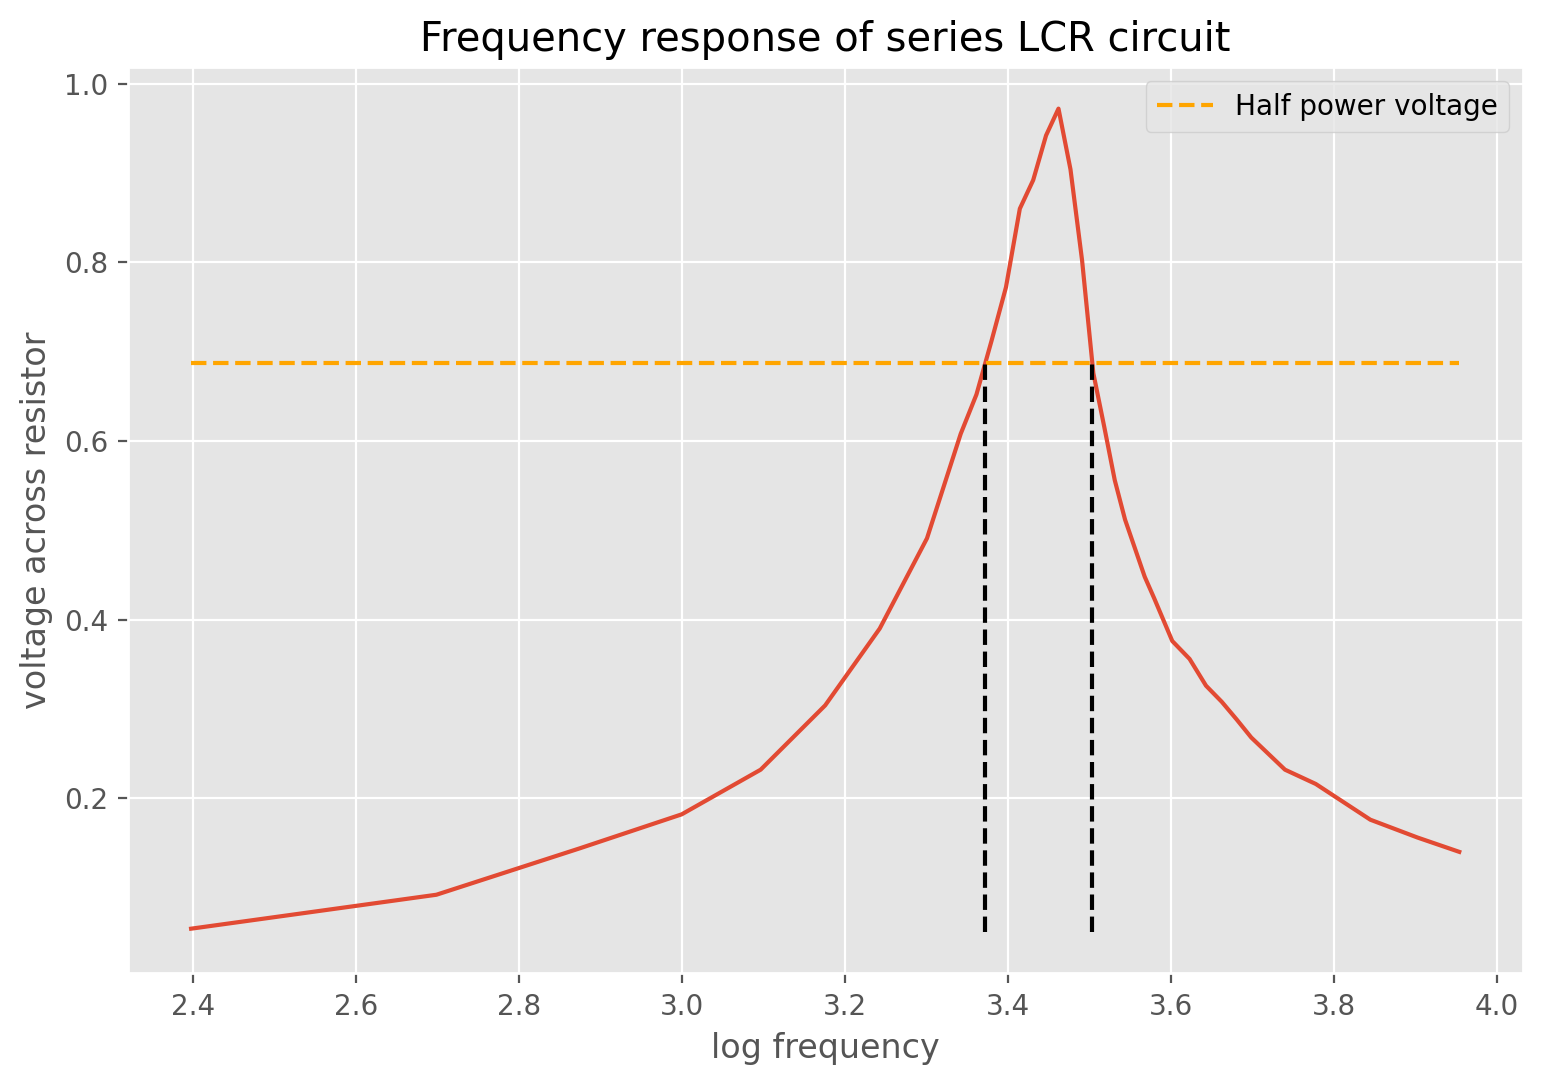

In [20]:
df = pd.read_csv('series.csv')
logf = np.log10(df['freq'].to_numpy()*1000)
voltage = 0.001 * df['voltage'].to_numpy()

halfPower = 0.001 * float(df['voltage'].max())/np.sqrt(2)

cutoff_freqs = interpolate.InterpolatedUnivariateSpline(logf, voltage - halfPower)
f1 = 10**cutoff_freqs.roots()[0]
f2 = 10**cutoff_freqs.roots()[1]
print(f"Cutoff freqs are: {f1:.4} Hz, and {f2:.4} Hz")
print(f"Bandwidth = {(f2-f1):.4} Hz")
print(f"Q-factor is {(2900/(f2-f1)):.4}")
plt.figure(figsize=(9,6),dpi=200)
plt.plot(logf, voltage)
plt.xlabel('log frequency')
plt.ylabel('voltage across resistor')
plt.hlines(halfPower, logf.min(), logf.max(),color='orange', linestyle='dashed', label='Half power voltage')
plt.vlines(cutoff_freqs.roots(), 0.05, halfPower, colors='black', linestyles='dashed')
plt.legend()
plt.title('Frequency response of series LCR circuit')
plt.savefig('series.png')
plt.show()

